# LSE Machine Learning: Practical Applications

## Module 3 Unit 2 IDE Activity (Practice)
### In this activity you have the opportunity to practise the methods of fitting a regression model onto the Term Life Insurance data set. The aim of fitting the regression model onto this data set is to predict the policy face value, representing what the company will pay in the event of the insured individual's death.
As you complete this activity, you are required to read the text cells throughout the notebook and then run each code cell that follows. Be mindful of the syntax used to execute certain functionalities within R to produce a desired result. In completing this activity, you should gain the necessary practical skills to complete the IDE Activity (Assessment) that follows.

### Step 1: Load the data
To start the process of fitting the regression model onto the Term Life Insurance data set, the data set must be loaded into R, after loading the tidyverse libraries.

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Once the tidyverse libraries have been loaded, the Term Life Insurance data set can be loaded by using the `read_csv()` function. Once the data set is loaded, the top rows of the data set can be viewed with the `head(data)` function.

In [2]:
data <- read.csv("Term Life Insurance.csv")
head(data)

,GENDER,AGE,MARSTAT,EDUCATION,ETHNICITY,SMARSTAT,SGENDER,SAGE,SEDUCATION,NUMHH,INCOME,TOTINCOME,CHARITY,FACE,FACECVLIFEPOLICIES,CASHCVLIFEPOLICIES,BORROWCVLIFEPOL,NETVALUE
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,30,1,16,3,2,2,27,16,3,43000,43000,0,20000,0,0,0,0
2,1,50,1,9,3,1,2,47,8,3,12000,0,0,130000,0,0,0,0
3,1,39,1,16,1,2,2,38,16,5,120000,90000,500,1500000,0,0,0,0
4,1,43,1,17,1,1,2,35,14,4,40000,40000,0,50000,75000,0,5,0
5,1,61,1,15,1,2,2,59,12,2,25000,1020000,500,0,7000000,300000,5,0
6,1,34,2,11,2,1,2,31,14,4,28000,0,0,220000,0,0,0,0


### Step 2: Visualise the data

Before fitting a regression model onto a data set, the data should be visualised to understand the underlying relationship between the variables. The data can often be skewed, requiring further transformations before proceeding. 

#### Response variable
In this example, the FACE variable must be predicted, so you should determine whether this variable is normally distributed in the data set, or whether further transformation is required. To do this, recall the histogram generation process from Module 1, and generate a histogram for the FACE variable. 

Normally, distributed data forms a bell-shaped histogram and represents ideal data, with a large number of observations concentrated in the middle of the graph. Plotting the face of the FACE variable reveals a highly skewed distribution. 

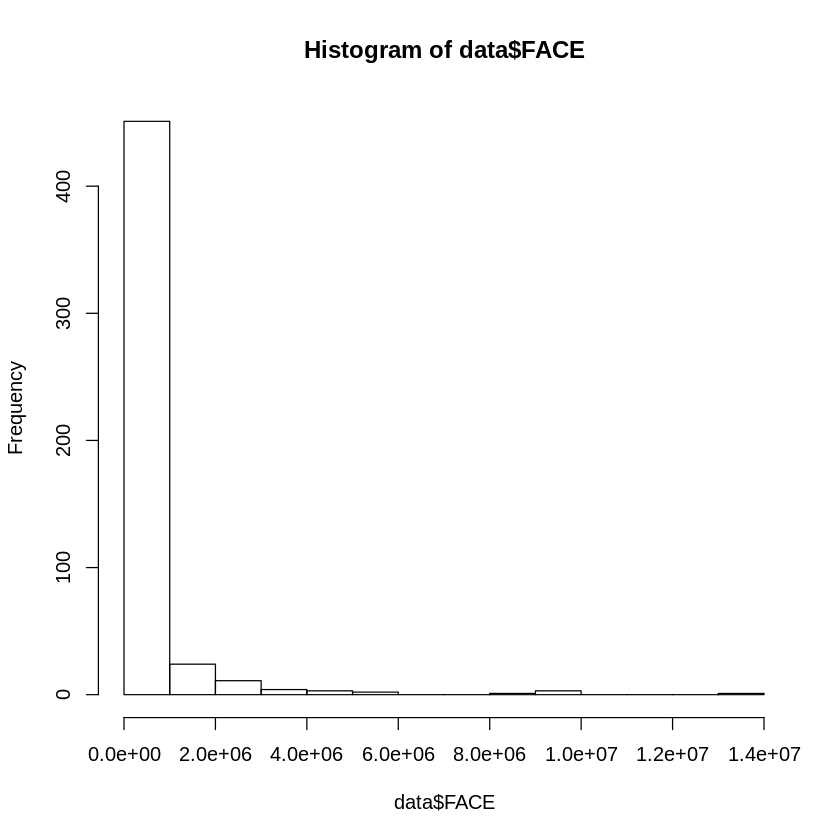

In [3]:
hist(data$FACE)

Plotting a histogram of the natural logarithm reveals a more symmetrical distribution.

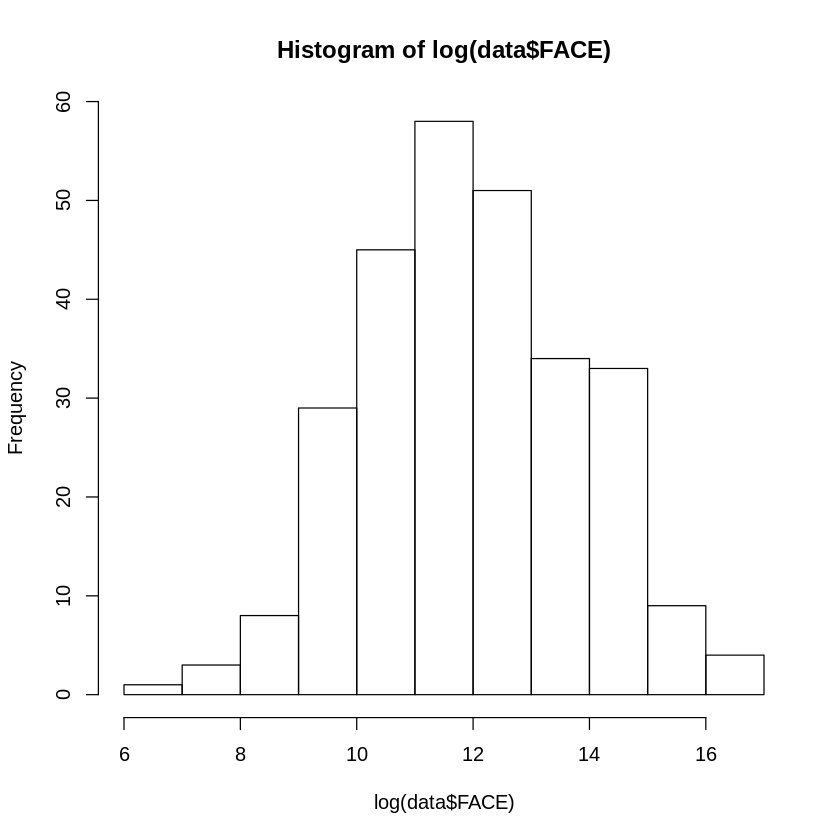

In [4]:
hist(log(data$FACE))

Since the histogram of the raw FACE variable does not demonstrate a bell shape, but the log-transformed variable does, the log-transformed variable should be analysed further, and potentially be used in the analysis. A variable titled logFACE is created using the `mutate` function, which is the natural logarithm of the FACE variable.

In [5]:
data <- data %>% mutate(logFACE = log(FACE))

A summary of the data can now be created using the `summary()` function.

In [6]:
summary(data)

     GENDER           AGE           MARSTAT       EDUCATION       ETHNICITY  
 Min.   :0.000   Min.   :20.00   Min.   :0.00   Min.   : 2.00   Min.   :1.0  
 1st Qu.:1.000   1st Qu.:37.00   1st Qu.:0.00   1st Qu.:12.00   1st Qu.:1.0  
 Median :1.000   Median :47.00   Median :1.00   Median :14.00   Median :1.0  
 Mean   :0.826   Mean   :47.16   Mean   :0.79   Mean   :14.06   Mean   :1.6  
 3rd Qu.:1.000   3rd Qu.:58.00   3rd Qu.:1.00   3rd Qu.:16.00   3rd Qu.:2.0  
 Max.   :1.000   Max.   :85.00   Max.   :2.00   Max.   :17.00   Max.   :7.0  
    SMARSTAT        SGENDER           SAGE        SEDUCATION        NUMHH     
 Min.   :0.000   Min.   :0.000   Min.   : 0.0   Min.   : 0.00   Min.   :1.00  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.: 0.0   1st Qu.: 0.00   1st Qu.:2.00  
 Median :1.000   Median :2.000   Median :39.0   Median :12.00   Median :2.00  
 Mean   :1.198   Mean   :1.446   Mean   :33.4   Mean   :10.02   Mean   :2.87  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:51.0   3rd Qu.:16.

While the transformed logFACE is better for the analysis, the transformation would result in an error for zero values of the FACE variable. The undefined values would display as negative infinity. These values need to be removed from the data set. Before reviewing the summary statistics again, the negative infinity values are removed using the `filter` function. 

> **Note:** These steps tend to be iterative in practice, and you have to review and potentially apply multiple transformations to the data.

In [7]:
data <- data %>% filter(logFACE != -Inf)
summary(data)

     GENDER            AGE           MARSTAT         EDUCATION    
 Min.   :0.0000   Min.   :20.00   Min.   :0.0000   Min.   : 2.00  
 1st Qu.:1.0000   1st Qu.:39.00   1st Qu.:1.0000   1st Qu.:13.00  
 Median :1.0000   Median :47.00   Median :1.0000   Median :16.00  
 Mean   :0.8655   Mean   :47.83   Mean   :0.8291   Mean   :14.52  
 3rd Qu.:1.0000   3rd Qu.:57.00   3rd Qu.:1.0000   3rd Qu.:16.50  
 Max.   :1.0000   Max.   :82.00   Max.   :2.0000   Max.   :17.00  
   ETHNICITY        SMARSTAT        SGENDER           SAGE      
 Min.   :1.000   Min.   :0.000   Min.   :0.000   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:26.50  
 Median :1.000   Median :1.000   Median :2.000   Median :41.00  
 Mean   :1.593   Mean   :1.295   Mean   :1.571   Mean   :36.24  
 3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:51.00  
 Max.   :7.000   Max.   :3.000   Max.   :2.000   Max.   :78.00  
   SEDUCATION        NUMHH          INCOME           TOTINCOME       
 Min. 

#### Evaluate continuous variables
Next, you would typically use matrix scatterplots and correlation matrices to identify linear relationships. First, you need to look at the matrix scatterplot for the raw and transformed FACE and INCOME variables.

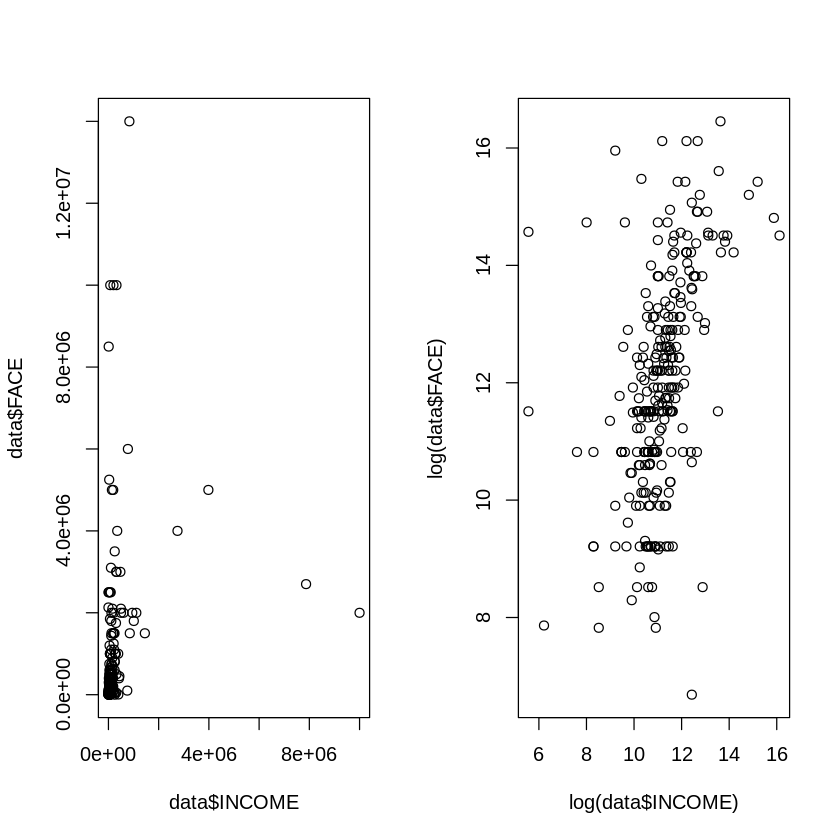

In [8]:
# Plot raw and log-transformed FACE and INCOME variables
par(mfrow=c(1,2))
plot(data$INCOME, data$FACE); plot(log(data$INCOME), log(data$FACE))

It is difficult to see the linear relationship for the raw or untransformed variables, but this relationship is fairly strong and visible for the log-transformed variables. In the next step, you will continue to evaluate the relationships between the identified variables. It is possible to use pair plots to gain insights from the visual characteristics of the relationships.

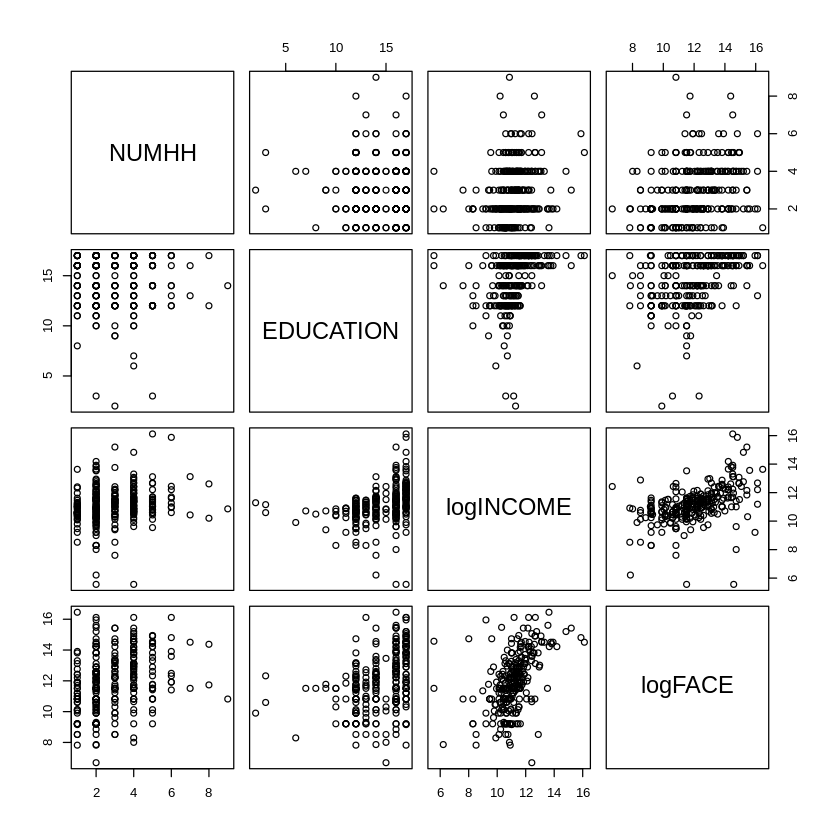

In [9]:
# Use pair plots to visually evaluate the relationships between multiple variables
par(mfrow=c(1,1))
logINCOME = log(data$INCOME); 
logFACE = log(data$FACE);
NUMHH = data$NUMHH
EDUCATION = data$EDUCATION
pairs(data.frame(NUMHH, EDUCATION, logINCOME, logFACE))

Review the correlation matrix.

In [10]:
cor(data.frame(NUMHH, EDUCATION, logINCOME, logFACE))

,NUMHH,EDUCATION,logINCOME,logFACE
NUMHH,1.0000000,-0.0635292,0.1793354,0.2876115
EDUCATION,-0.0635292,1.0000000,0.3427036,0.3828489
logINCOME,0.1793354,0.3427036,1.0000000,0.4818427
logFACE,0.2876115,0.3828489,0.4818427,1.0000000


Next, apply log transformations to all the money-type elements in the data set. Note that this transformation is also applied to other variables that fall outside the scope of this demonstration; these variables are included for consistency with the source calculations.

In [11]:
data <- data %>% mutate(logINCOME = log(INCOME), 
                        logTOTINCOME = log(TOTINCOME), 
                        logCHARITY = log(CHARITY),
                        logFACECVLIFEPOLICIES = log(FACECVLIFEPOLICIES), 
                        logCASHCVLIFEPOLICIES = log(CASHCVLIFEPOLICIES),
                        logBORROWCVLIFEPOL = log(BORROWCVLIFEPOL),
                        logNETVALUE = log(NETVALUE))

Visualisation techniques can be useful in exploring and gaining a better understanding of the data, and serves as a mechanism to communicate the results with other parties. You would typically use these techniques to explore the data and to identify elements to be explored in more detail, as in the preceding example. At a high level, you can conclude that there seems to be linear relationships between logFACE and logINCOME, and logFACE and logCHARITY. There also appears to be a quadratic relationship between logFACE and logTOTINCOME. There are no immediately apparent relationships between logFACE and the other variables.

#### Categorical variables
Next, move to categorical variables. Since scatterplots are not suitable for categorical variables, blox plots are created to show the possible relationships between the logFACE variable and the GENDER, MARSTAT, ETHNICITY, SGENDER, and SMARSTAT variables.

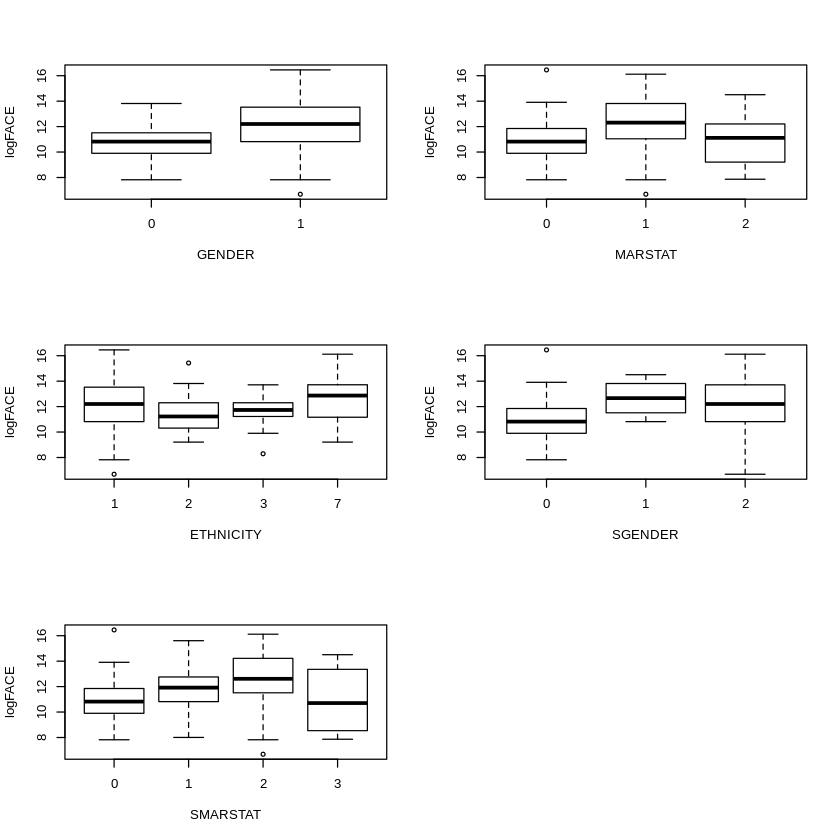

In [12]:
par(mfrow=c(3,2))
boxplot(logFACE ~ GENDER, data = data)
boxplot(logFACE ~ MARSTAT, data = data)
boxplot(logFACE ~ ETHNICITY, data = data)
boxplot(logFACE ~ SGENDER, data = data)
boxplot(logFACE ~ SMARSTAT, data = data)

There is a lot of overlap between the boxes in each plot, suggesting that logFACE does not vary significantly across the levels of each categorical variable. These categorical variables would therefore have little to no explanatory power in trying to predict logFACE.

#### Regression model: Term Life Insurance data set
Construct a regression model using the following three covariates: NUMHH, logINCOME, and EDUCATION. The response variable is logFACE.

In [13]:
reg_model <- lm(logFACE ~ logINCOME + EDUCATION + NUMHH, data = data)
summary(reg_model)


Call:
lm(formula = logFACE ~ logINCOME + EDUCATION + NUMHH, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7420 -0.8681  0.0549  0.9093  4.7187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.58408    0.84643   3.053  0.00249 ** 
logINCOME    0.49353    0.07754   6.365 8.32e-10 ***
EDUCATION    0.20641    0.03883   5.316 2.22e-07 ***
NUMHH        0.30605    0.06333   4.833 2.26e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 271 degrees of freedom
Multiple R-squared:  0.3425,	Adjusted R-squared:  0.3353 
F-statistic: 47.07 on 3 and 271 DF,  p-value: < 2.2e-16


In [14]:
# Obtain the Anova table
anova(reg_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logINCOME,1,222.62925,222.629246,95.70075,1.497782e-19
EDUCATION,1,51.50220,51.502200,22.13905,4.047580e-06
NUMHH,1,54.33593,54.335931,23.35717,2.255708e-06
Residuals,271,630.42897,2.326306,NA,NA


### Step 3: Interpret the output
The fitted regression can be written as: 
> ```log(FACE) = 2.584 + 0.494log(INCOME) + 0.206EDUCATION + 0.306NUMHH```

Since a transformed response variable is used, it is implied that additional work is required to make the equation more intuitive to understand. The formula says that if income and the number of household members are kept fixed, an increase in education of one year would result in an increase in logFACE by 0.206, on average.

In [15]:
# Education
exp(0.206)

[1] 1.228753

This implies that, on average, an increase of 23% in the FACE variable is expected if education is increased by one year, and the income and number of household members are kept constant.

Repeating the exercise and keeping the education level and number of household members fixed, a 10% average increase in income level will increase the payout in the event of death by 4.8%.

By the same token, when fixing income and education level, one more household member increases the payout in the event of death, on average, by 100(exp(0.306) − 1) = 35.8%. This is not surprising, as one more household member should mean significantly more premium for covering the whole family.

There are various actions that still need to be taken that lie outside the scope of this activity. You still need to check if the model assumptions are satisfied. You may want to further analyse the coefficients by constructing confidence intervals. You may also want to perform specific hypothesis tests on some coefficients.

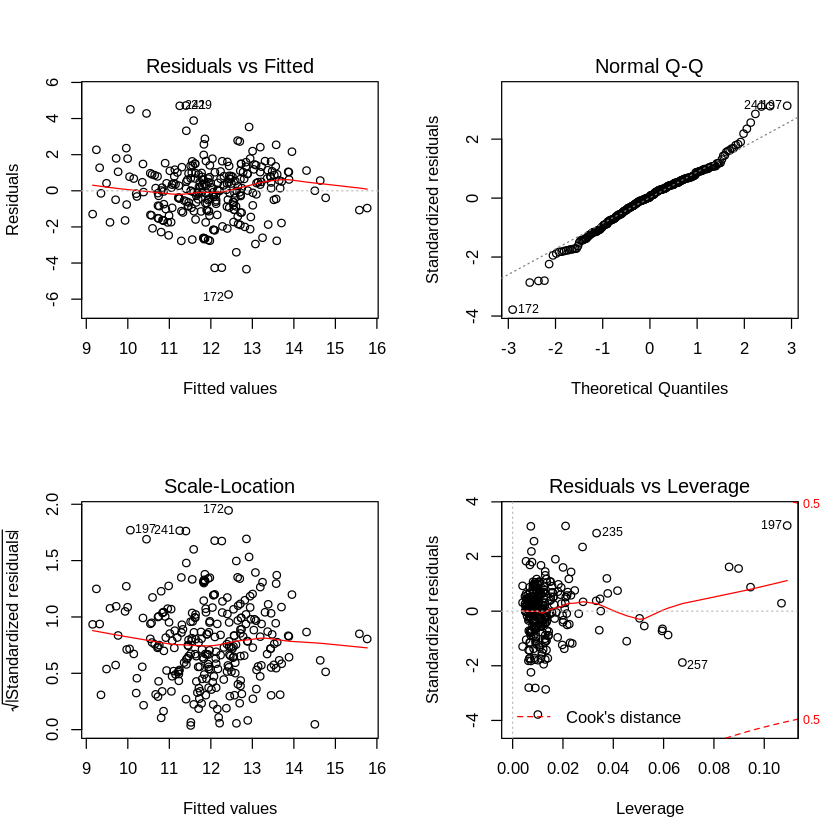

In [16]:
# Plot the model using default plots
par(mfrow=c(2,2))
plot(reg_model)

### Step 4: Make a prediction
In order to demonstrate how the model would be used, you can manually provide the input values for a new observation. You would typically generate random data, but in this case, there are three hard-coded observations included, which can serve as test cases.

In [17]:
# Add test cases to a new data frame
predData <- data.frame(logINCOME = c(log(100000),log(110000),log(90000)), 
                       EDUCATION = c(16,18,15), 
                       NUMHH = c(5,6,3))

In [18]:
# Predict the balances for the test cases
predBalance <- predict(reg_model, predData)
exp(predBalance)

1         2         3 
 488419.0 1050567.4  204520.8

The model predicts FACE values of 488,419; 1,050,567; and 204,520 for the test cases. You can experiment with the input parameters in the cell below to evaluate the impact of changing parameters.

In [19]:
predData2 <- data.frame(logINCOME = log(100000), 
                       EDUCATION = 16, 
                       NUMHH = 5)
predBalance2 <- predict(reg_model, predData2)
exp(predBalance2)

1 
488419